In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df = df.dropna()

print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [6]:
import seaborn as sns

In [11]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

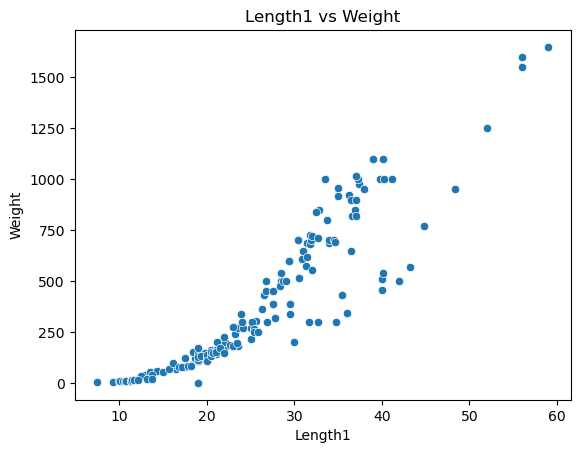

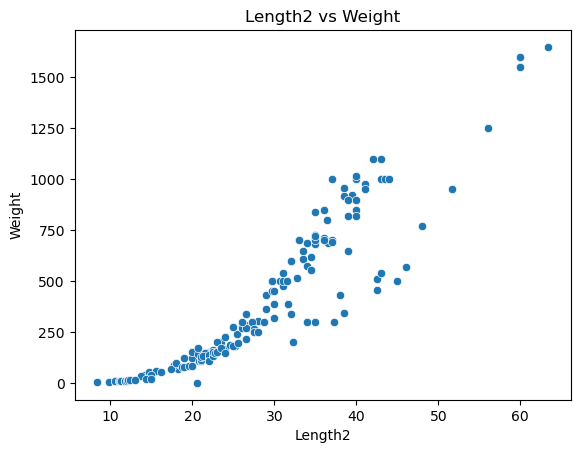

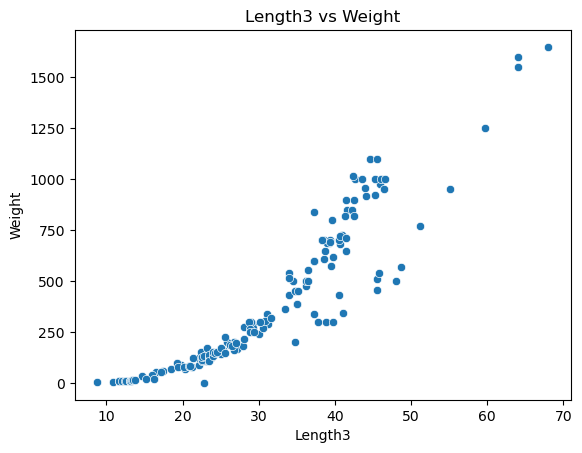

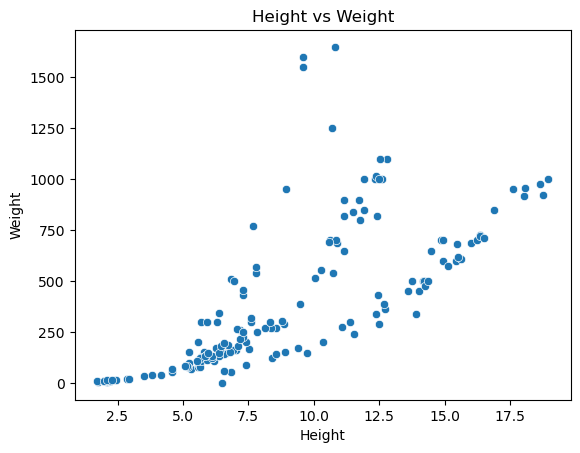

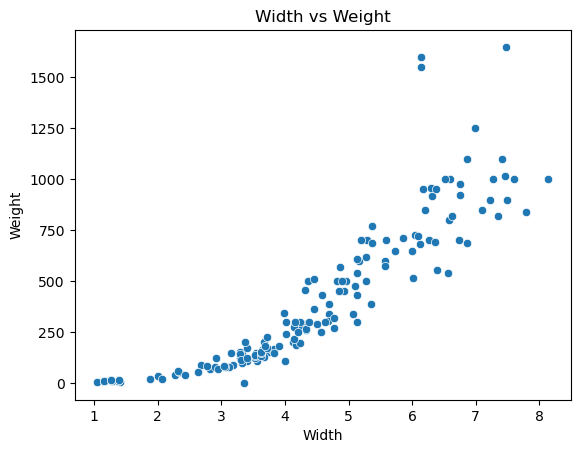

In [12]:
numeric_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

for feature in numeric_features:
    sns.scatterplot(x=df[feature], y=df['Weight'])
    plt.title(f'{feature} vs Weight')
    plt.show()


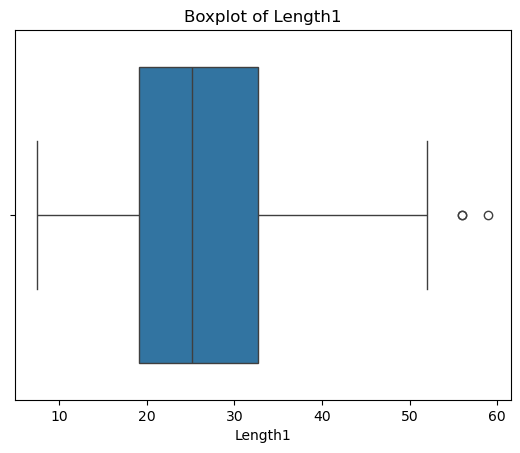

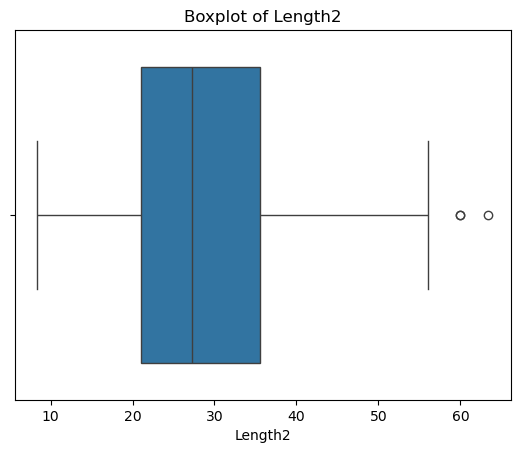

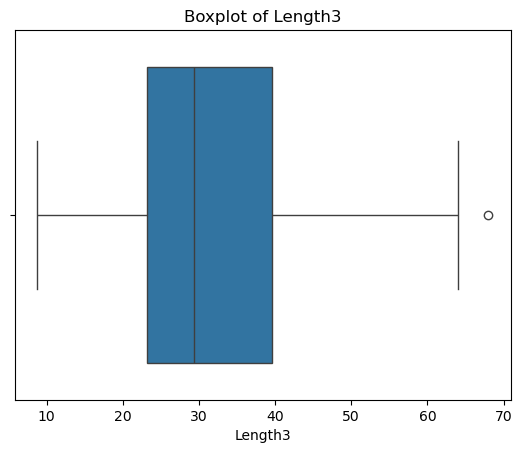

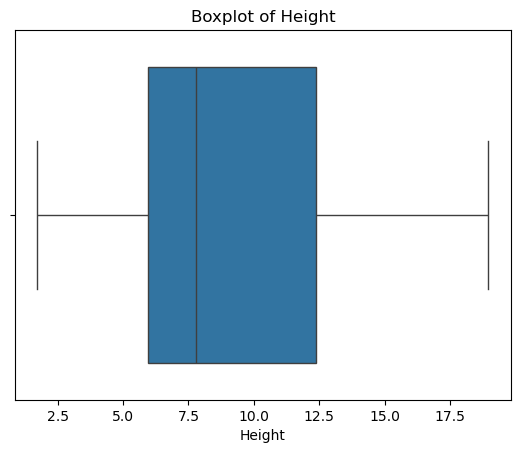

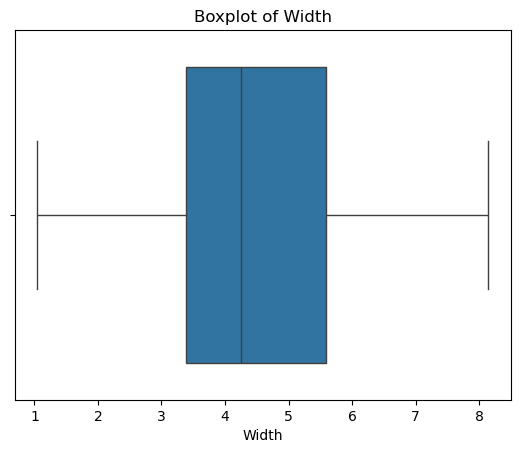

In [13]:
for feature in numeric_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Optional: Remove extreme outliers using IQR
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

In [14]:
# Average length
df['avg_length'] = (df['Length1'] + df['Length2'] + df['Length3']) / 3

# Body ratio: Height to Length
df['height_to_length'] = df['Height'] / df['avg_length']

# Width to Length ratio
df['width_to_length'] = df['Width'] / df['avg_length']


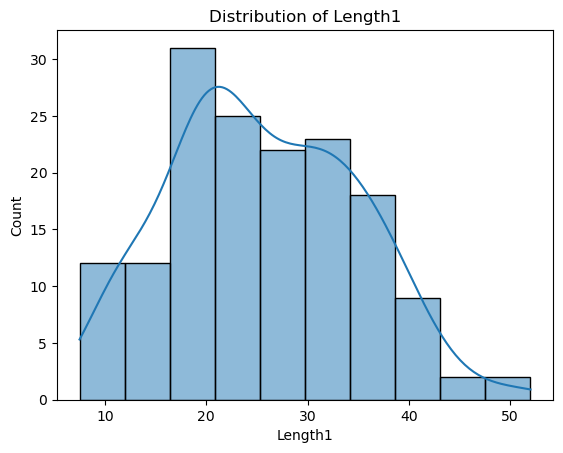

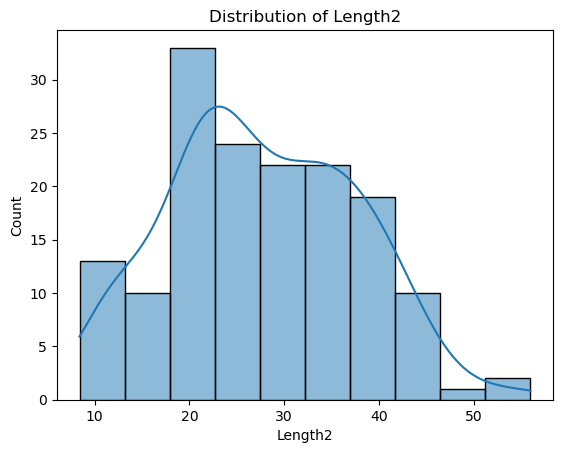

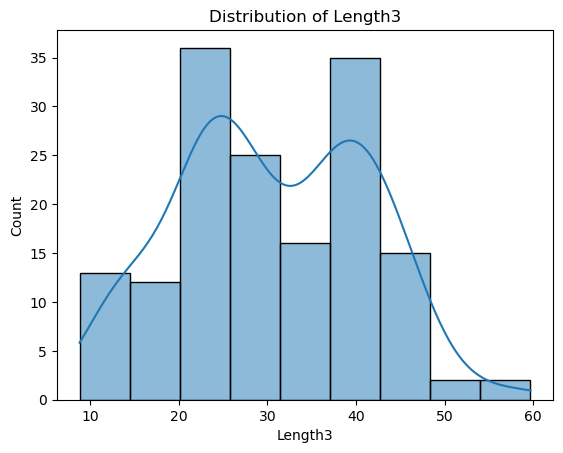

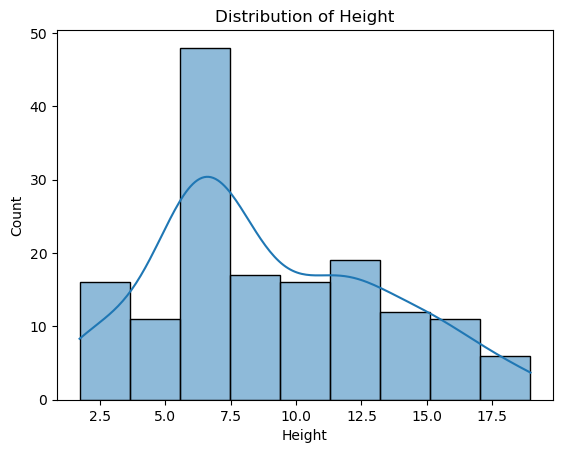

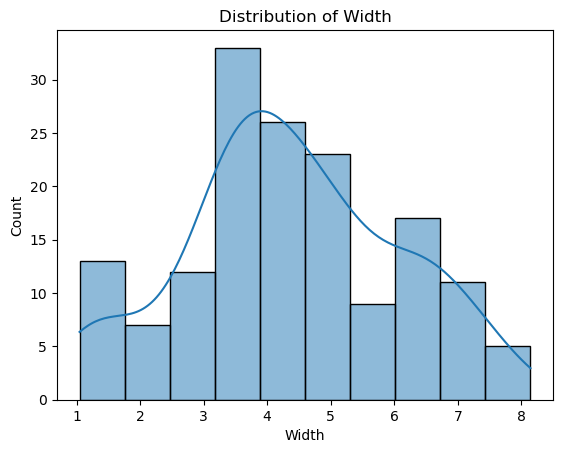

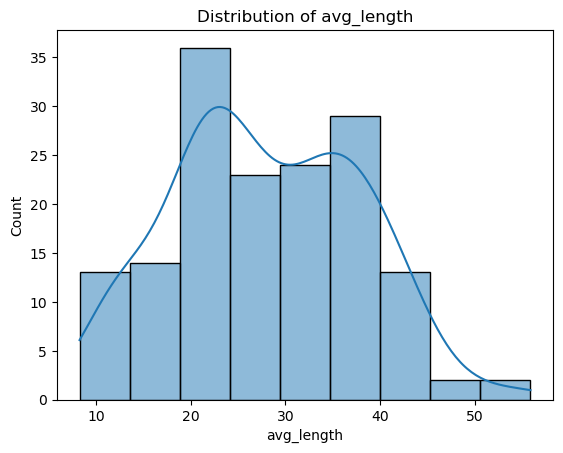

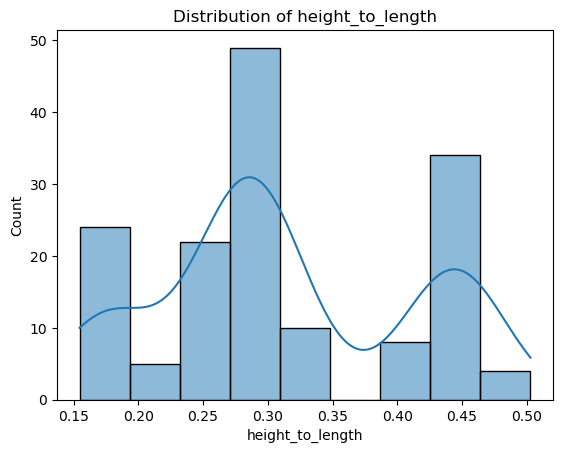

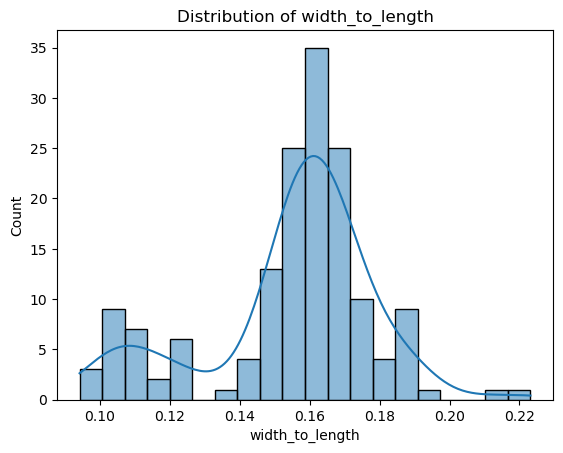

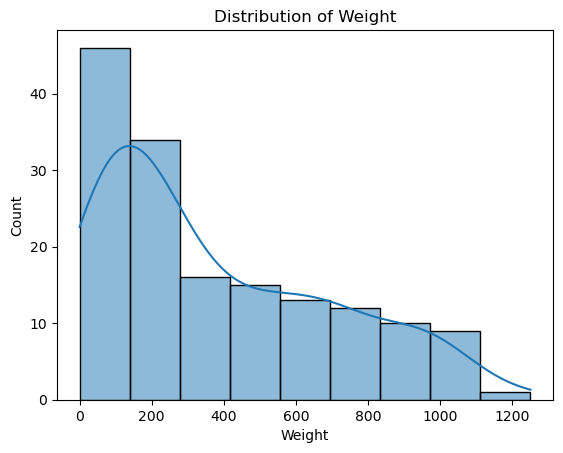

In [15]:
features_to_plot = numeric_features + ['avg_length', 'height_to_length', 'width_to_length', 'Weight']

for feature in features_to_plot:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [17]:
# Features and target
X = df.drop(columns=['Weight', 'Species'])  # exclude target & categorical column
y = df['Weight']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [20]:
ridge = Ridge(alpha=1.0)  # alpha can be tuned
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [25]:
lasso = Lasso(alpha=0.05, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [22]:
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)


In [24]:
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")


Linear Regression -> RMSE: 69.88, R2: 0.95
Ridge Regression -> RMSE: 74.17, R2: 0.95
Lasso Regression -> RMSE: 71.18, R2: 0.95
Polynomial Regression -> RMSE: 49.93, R2: 0.98
